# Social Inequality Analysis

## Introduction
- **Use Case: Analyzing Social Inequality in the Titanic Dataset**

- **Objective**: In this use case we will be focusing on examining how social class influenced the survival rates of passengers aboard the Titanic. The dataset includes key indicators of social status, such as passenger class (Pclass), fare, and other demographic data, which provide an excellent opportunity to study the relationship between wealth, social inequality, and survival during the disaster.

- **Approach**: Apply different machine learning models (Logistic Regression, Feed Forward Neural Networks...) to study the relationship between wealth, social inequality, and survival.

## Import Liabraries and Utility Functions

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for all plots to a default Matplotlib style
plt.style.use('default')

from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(["#FF000", "#0000FF"])
cmap_light = ListedColormap(["#FFBBBB", "#BBBBFF"])

# Define a function for randomly splitting data into train and test:
def train_test_random_spliter(df, train_size, seed_value=42):

    # random value for split
    np.random.seed(seed_value)
    shuffled_indices = np.random.permutation(len(df))

    # Define the split index
    split_index = int(train_size * len(shuffled_indices))

    # Create train and test sets by splitting the shuffled DataFrame
    df_train = df.iloc[shuffled_indices[:split_index]]
    df_test = df.iloc[shuffled_indices[split_index:]]

    return df_train, df_test

## Data Understanding and Preprocessing

In this part, we will inspect the data and visualize the survival rate distribution across classes and genders. Then examine the influence of Pclass, Fare, and other relevant columns on the target Survived.
Feature correlation analysis.

In [156]:
# Import Data:
titanic_df = pd.read_csv("data/TitanicPreprocessed.csv")
# Display basic information about the dataset
print("Dataset Information:")
titanic_df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             891 non-null    int64  
 1   Age             891 non-null    float64
 2   SibSp           891 non-null    int64  
 3   Parch           891 non-null    int64  
 4   Fare            891 non-null    float64
 5   Title_Master    891 non-null    int64  
 6   Title_Miss      891 non-null    int64  
 7   Title_Mr        891 non-null    int64  
 8   Title_Mrs       891 non-null    int64  
 9   Title_Officer   891 non-null    int64  
 10  Title_Royalty   891 non-null    int64  
 11  Embarked_C      891 non-null    int64  
 12  Embarked_Q      891 non-null    int64  
 13  Embarked_S      891 non-null    int64  
 14  Cabin_A         891 non-null    int64  
 15  Cabin_B         891 non-null    int64  
 16  Cabin_C         891 non-null    int64  
 17  Cabin_D       

In [157]:
titanic_df.columns

Index(['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_U', 'IsChild',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Ticket_A', 'Ticket_A4',
       'Ticket_A5', 'Ticket_AQ3', 'Ticket_AQ4', 'Ticket_AS', 'Ticket_C',
       'Ticket_CA', 'Ticket_CASOTON', 'Ticket_FC', 'Ticket_FCC', 'Ticket_Fa',
       'Ticket_LINE', 'Ticket_LP', 'Ticket_PC', 'Ticket_PP', 'Ticket_PPP',
       'Ticket_SC', 'Ticket_SCA3', 'Ticket_SCA4', 'Ticket_SCAH', 'Ticket_SCOW',
       'Ticket_SCPARIS', 'Ticket_SCParis', 'Ticket_SOC', 'Ticket_SOP',
       'Ticket_SOPP', 'Ticket_SOTONO2', 'Ticket_SOTONOQ', 'Ticket_SP',
       'Ticket_STONO', 'Ticket_STONO2', 'Ticket_STONOQ', 'Ticket_SWPP',
       'Ticket_WC', 'Ticket_WEP', 'Ticket_XXX', 'FamilySize', 'Singleton',
       'SmallFamily', 'Large

In [158]:
# Display summary statistics of the numerical columns
print("Summary Statistics:")
titanic_df.describe()

Summary Statistics:


,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,...,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.0,891.000000,891.000000,891.000000,891.000000,891.000000,891.0,891.000000,891.000000,891.000000
mean,0.647587,29.207823,0.523008,0.381594,32.204208,0.044893,0.206510,0.580247,0.142536,0.020202,...,0.0,0.002245,0.011223,0.003367,0.741863,1.904602,0.0,0.327722,0.069585,0.383838
std,0.477990,13.557871,1.102743,0.806057,49.693429,0.207186,0.405028,0.493796,0.349796,0.140770,...,0.0,0.047351,0.105403,0.057961,0.437855,1.613459,0.0,0.469646,0.254589,0.486592
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,21.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000
50%,1.000000,26.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000
75%,1.000000,36.750000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,1.000000,2.000000,0.0,1.000000,0.000000,1.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,11.000000,0.0,1.000000,1.000000,1.000000


In [159]:
# Check for missing values in each column
print("Missing Values:")
titanic_df.isnull().sum()

Missing Values:


Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
              ..
FamilySize     0
Singleton      0
SmallFamily    0
LargeFamily    0
Survived       0
Length: 69, dtype: int64

In [160]:
# Display the first few rows of the dataset
print("First few rows:")
titanic_df.head()

First few rows:


,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,...,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily,Survived
0,1,22.0,1,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,2,0,1,0,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,...,0,0,0,0,0,2,0,1,0,1
2,0,26.0,0,0,7.9250,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,35.0,1,0,53.1000,0,0,0,1,0,...,0,0,0,0,1,2,0,1,0,1
4,1,35.0,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0


In [161]:
# Display the number of unique values
print("Unique Values per Column:")
titanic_df.nunique()

Unique Values per Column:


Sex              2
Age             89
SibSp            7
Parch            7
Fare           248
              ... 
FamilySize       9
Singleton        1
SmallFamily      2
LargeFamily      2
Survived         2
Length: 69, dtype: int64

In [162]:
# Check for any duplicate rows
duplicates = titanic_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 95


In [163]:
# Remove duplicate rows
titanic_df = titanic_df.drop_duplicates()

# Verify if duplicates have been removed
duplicates_after = titanic_df.duplicated().sum()
print(f"Number of duplicate rows after removal: {duplicates_after}")


Number of duplicate rows after removal: 0


In [164]:
print("Basic statistics for 'Survived':")
print(titanic_df['Survived'].describe())

Basic statistics for 'Survived':
count    796.000000
mean       0.409548
std        0.492060
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64


In [165]:
# Split Data into train and test datasets (allocating 80% for Trainning):
df_train, df_test = train_test_random_spliter(titanic_df, train_size=0.8)

# Separate the train and test datasets into features and predictor
X_train = df_train.iloc[:, :-1]
y_train = df_train['Survived']

X_test = df_test.iloc[:, :-1]
y_test = df_test['Survived']

# Now X_train, X_test, y_train, y_test contain the split data
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

# Storing Metrics:
metrics_db = {}

X_train shape: (636, 68), X_test shape: (160, 68)
y_train shape: (636,), y_test shape: (160,)


### Feature Engineering

In [166]:
# Set up data for Pclass
titanic_df['Pclass'] = titanic_df[['Pclass_1', 'Pclass_2', 'Pclass_3']].idxmax(axis=1)
titanic_df['Pclass'] = titanic_df['Pclass'].apply(lambda x: x.split('_')[1])

# Drop the one-hot encoded columns for Pclass
titanic_df.drop(['Pclass_1', 'Pclass_2', 'Pclass_3'], axis=1, inplace=True)

# Verify the columns have been dropped
print(titanic_df.head())

   Sex   Age  SibSp  Parch     Fare  Title_Master  Title_Miss  Title_Mr  \
0    1  22.0      1      0   7.2500             0           0         1   
1    0  38.0      1      0  71.2833             0           0         0   
2    0  26.0      0      0   7.9250             0           1         0   
3    0  35.0      1      0  53.1000             0           0         0   
4    1  35.0      0      0   8.0500             0           0         1   

   Title_Mrs  Title_Officer  ...  Ticket_SWPP  Ticket_WC  Ticket_WEP  \
0          0              0  ...            0          0           0   
1          1              0  ...            0          0           0   
2          0              0  ...            0          0           0   
3          1              0  ...            0          0           0   
4          0              0  ...            0          0           0   

   Ticket_XXX  FamilySize  Singleton  SmallFamily  LargeFamily  Survived  \
0           0           2          0    

### Survival Rate Distribution Across Classes and Genders

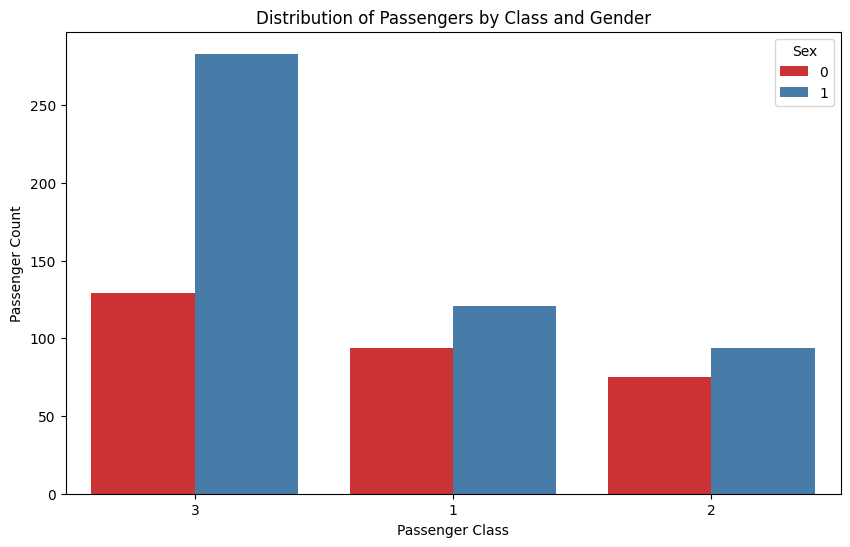

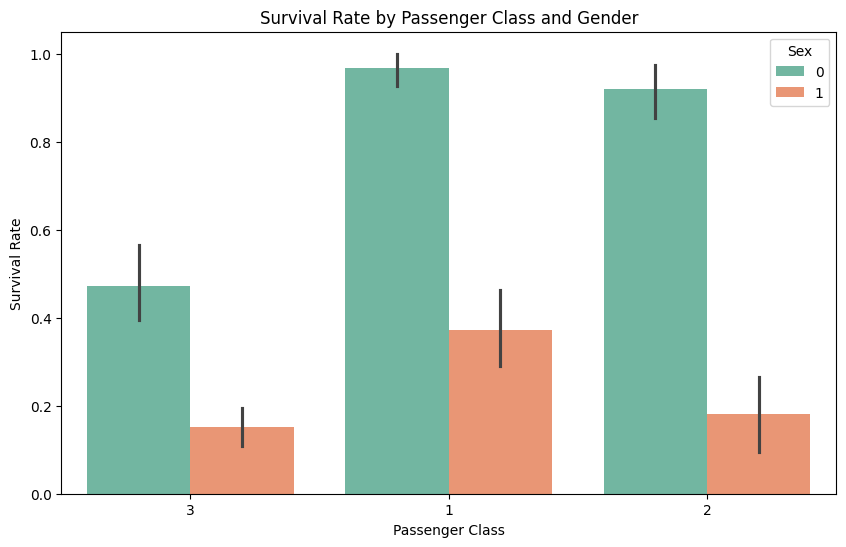

In [167]:
# Set up the plotting area
plt.figure(figsize=(10, 6))

# Create a grouped bar plot for Sex and Pclass showing survival
sns.countplot(x='Pclass', hue='Sex', data=titanic_df, palette='Set1')
plt.title('Distribution of Passengers by Class and Gender')
plt.ylabel('Passenger Count')
plt.xlabel('Passenger Class')

# Show the plot
plt.show()

# Now let's create a side-by-side plot for Survival based on Gender and Pclass
plt.figure(figsize=(10, 6))

# Create a grouped bar plot for Survival Rate by Gender and Pclass
sns.barplot(x='Pclass', hue='Sex', y='Survived', data=titanic_df, palette='Set2')
plt.title('Survival Rate by Passenger Class and Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')

# Show the plot
plt.show()

### Influence of Pclass and Fare on Survival

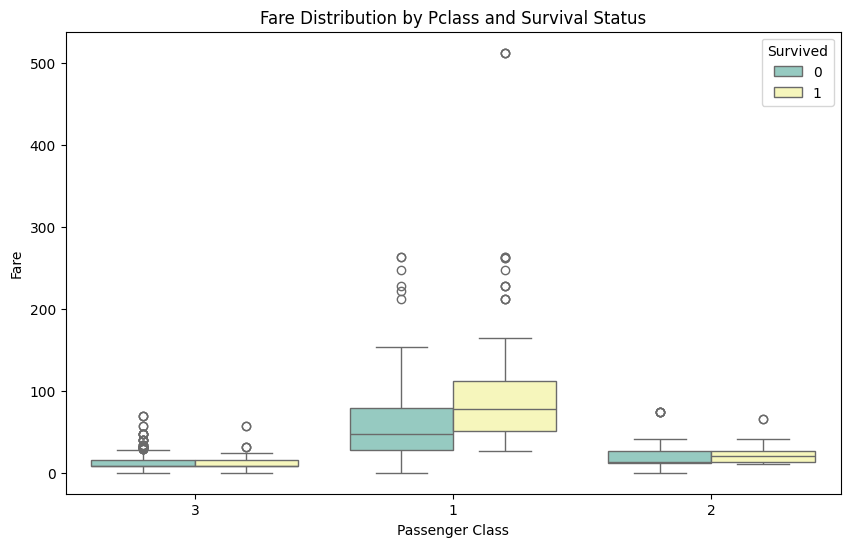

In [168]:
# Box plot for Fare vs Pclass and Survival
plt.figure(figsize=(10, 6))

sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=titanic_df, palette='Set3')
plt.title('Fare Distribution by Pclass and Survival Status')
plt.ylabel('Fare')
plt.xlabel('Passenger Class')
plt.legend(title='Survived', loc='upper right')

plt.show()

### Influence of Family size on Survival

C:\Users\Younes Abaroudi\AppData\Local\Temp\ipykernel_14468\2684471789.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FamilySize', y='Survived', data=titanic_df, palette='Set3')


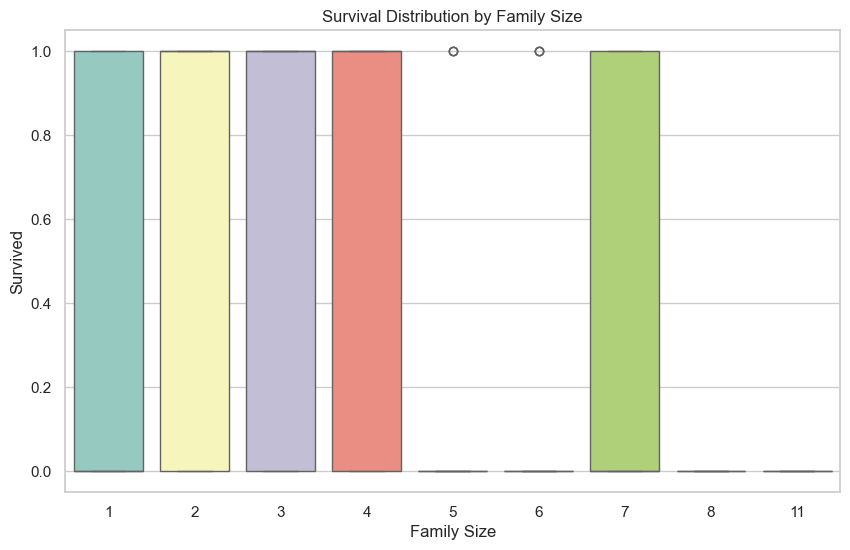

In [180]:
# Box plot for Family Size and Survival
plt.figure(figsize=(10, 6))

sns.boxplot(x='FamilySize', y='Survived', data=titanic_df, palette='Set3')
plt.title('Survival Distribution by Family Size')
plt.ylabel('Survived')
plt.xlabel('Family Size')
plt.show()



C:\Users\Younes Abaroudi\AppData\Local\Temp\ipykernel_14468\1924686206.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FamilySize', y='Survived', data=titanic_df, palette='Blues_d')


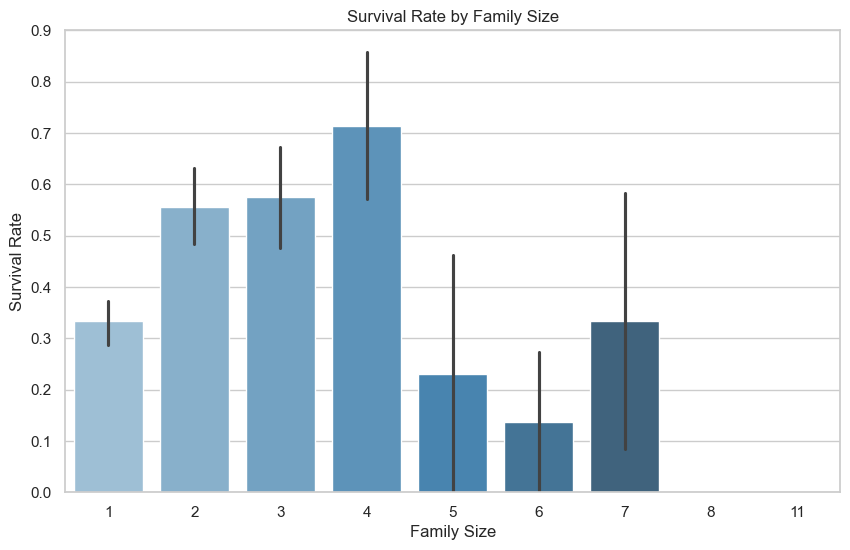

In [178]:
# Bar plot for Survival Rate by Family Size
plt.figure(figsize=(10, 6))

sns.barplot(x='FamilySize', y='Survived', data=titanic_df, palette='Blues_d')
plt.title('Survival Rate by Family Size')
plt.ylabel('Survival Rate')
plt.xlabel('Family Size')
plt.show()


C:\Users\Younes Abaroudi\AppData\Local\Temp\ipykernel_14468\2426543134.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='FamilySize', y='Survived', data=titanic_df, palette='Blues_d')


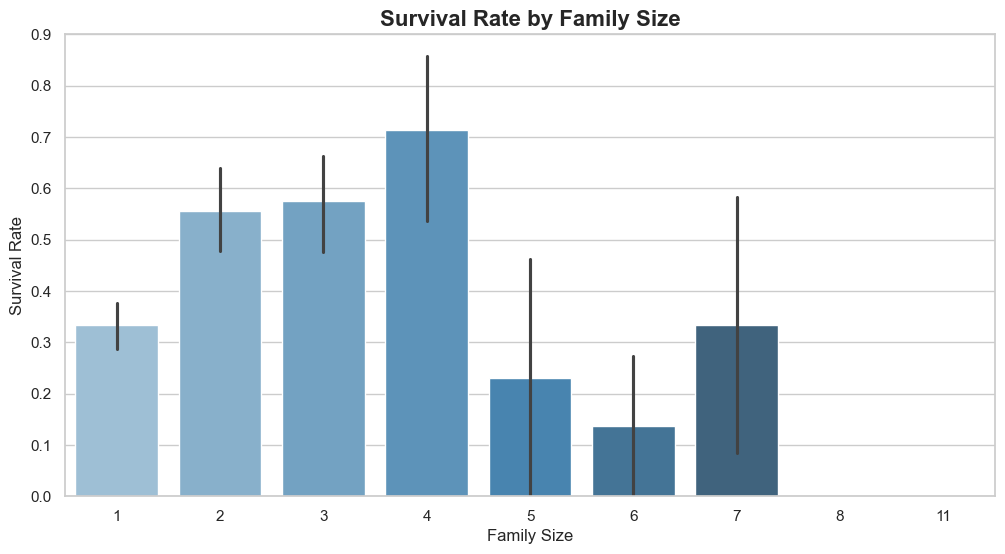

In [183]:
# Bar plot for Survival Rate by Family Size with enhancements
plt.figure(figsize=(12, 6))

# Create the bar plot
ax = sns.barplot(x='FamilySize', y='Survived', data=titanic_df, palette='Blues_d')

# Add title and labels with styling
plt.title('Survival Rate by Family Size', fontsize=16, fontweight='bold')
plt.ylabel('Survival Rate', fontsize=12)
plt.xlabel('Family Size', fontsize=12)

# Customize the x and y ticks for better readability
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Show the plot
plt.show()


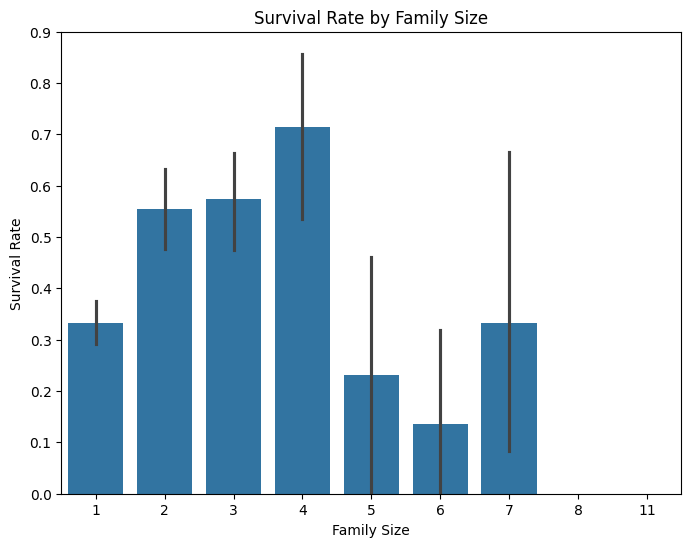

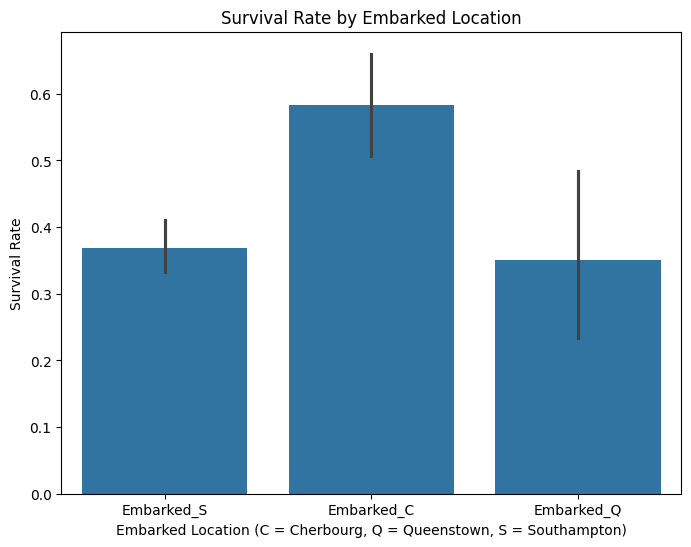

In [169]:
# Family size vs survival
plt.figure(figsize=(8, 6))
sns.barplot(x='FamilySize', y='Survived', data=titanic_df)
plt.title('Survival Rate by Family Size')
plt.ylabel('Survival Rate')
plt.xlabel('Family Size')
plt.show()

# Embarked vs survival (since it's one-hot encoded, we'll look at each embarkation point)
embarked_columns = ['Embarked_C', 'Embarked_Q', 'Embarked_S']
titanic_df['Embarked'] = titanic_df[embarked_columns].idxmax(axis=1)

plt.figure(figsize=(8, 6))
sns.barplot(x='Embarked', y='Survived', data=titanic_df)
plt.title('Survival Rate by Embarked Location')
plt.ylabel('Survival Rate')
plt.xlabel('Embarked Location (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.show()


Numerical columns selected for correlation: Index(['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_U', 'IsChild',
       'Ticket_A', 'Ticket_A4', 'Ticket_A5', 'Ticket_AQ3', 'Ticket_AQ4',
       'Ticket_AS', 'Ticket_C', 'Ticket_CA', 'Ticket_CASOTON', 'Ticket_FC',
       'Ticket_FCC', 'Ticket_Fa', 'Ticket_LINE', 'Ticket_LP', 'Ticket_PC',
       'Ticket_PP', 'Ticket_PPP', 'Ticket_SC', 'Ticket_SCA3', 'Ticket_SCA4',
       'Ticket_SCAH', 'Ticket_SCOW', 'Ticket_SCPARIS', 'Ticket_SCParis',
       'Ticket_SOC', 'Ticket_SOP', 'Ticket_SOPP', 'Ticket_SOTONO2',
       'Ticket_SOTONOQ', 'Ticket_SP', 'Ticket_STONO', 'Ticket_STONO2',
       'Ticket_STONOQ', 'Ticket_SWPP', 'Ticket_WC', 'Ticket_WEP', 'Ticket_XXX',
       'FamilySize', 'Singleton', 'SmallFamily', 'Larg

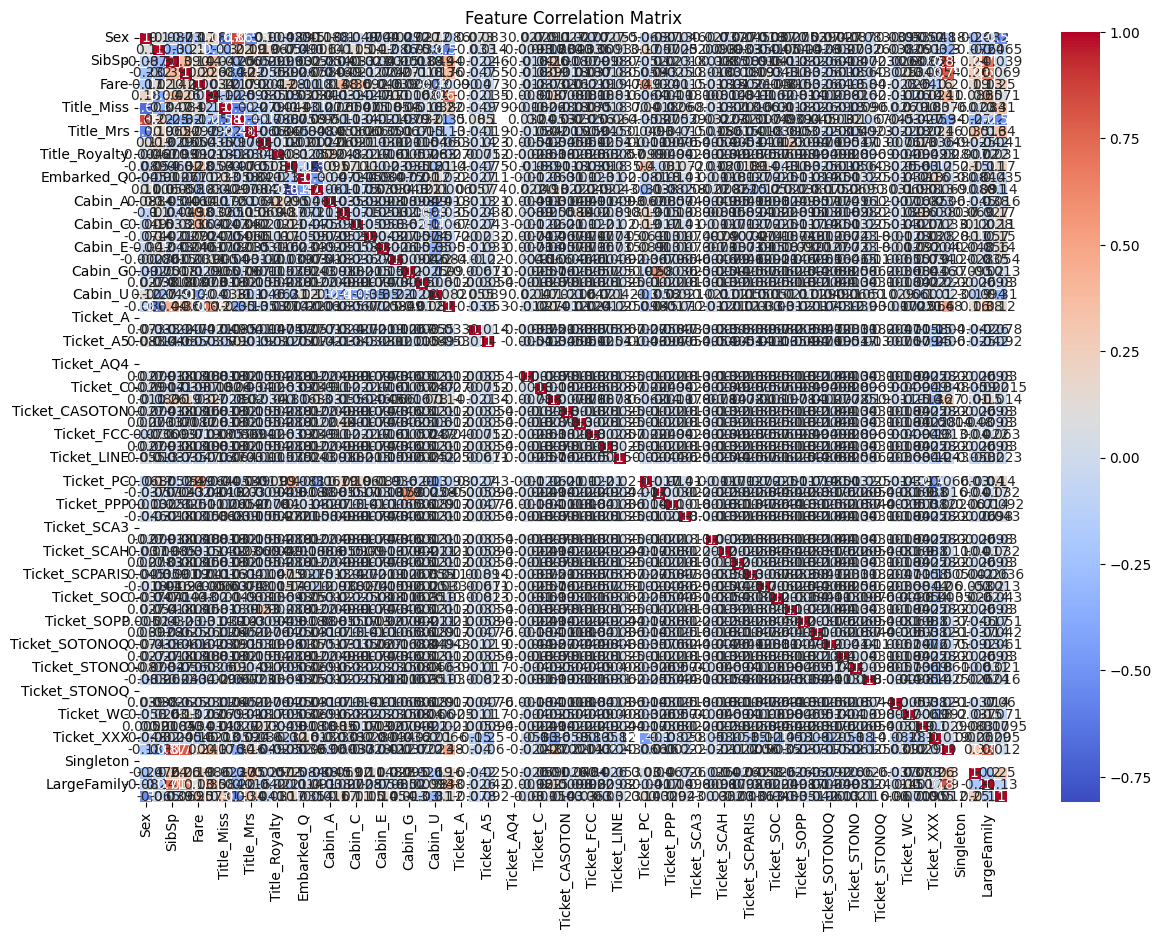

In [170]:
# Select only numerical columns for the correlation matrix
numerical_columns = titanic_df.select_dtypes(include=[np.number])

# Check if all columns selected are numerical
print(f"Numerical columns selected for correlation: {numerical_columns.columns}")

# Generate the correlation heatmap
plt.figure(figsize=(14, 10))
corr_matrix = numerical_columns.corr()  # Calculate correlations only for numerical columns

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()



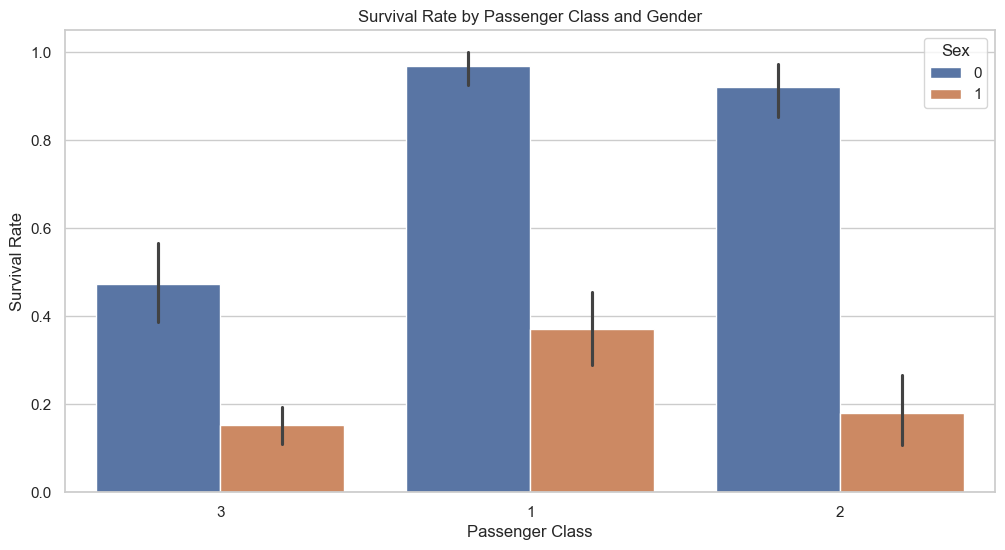

In [171]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create a figure to plot the survival rate distribution
plt.figure(figsize=(12, 6))

# Plot the survival rate by Pclass and Sex
sns.barplot(data=titanic_df, x='Pclass', y='Survived', hue='Sex')

# Add title and labels
plt.title('Survival Rate by Passenger Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

# Show the plot
plt.show()


### Utility Functions

In [172]:
def sigmoid(h):
    return 1 / (1 + np.exp(-h))

def cross_entropy(y, p_hat):
    return - (1/len(y)) * np.sum(y*np.log(p_hat) + (1-y)* np.log(1 - p_hat))

def accuracy(y, y_hat):
    return np.mean(y == y_hat)

### Binary Logistic Regression

In [173]:
class LogisticRegression:

    def __init__(self, thresh=0.5):
        self.thresh = thresh
        self.W = None
        self.b = None
    
    def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve=False):
        epochs = int(epochs)
        N, D = X.shape

        # Initialize  Weights and biases:
        self.W = np.random.randn(D)
        self.b = np.random.randn(1)

        # Create Zero valued container for J
        J = np.zeros(epochs)

        # SGD
        for epoch in range(epochs):
            p_hat = self.__forward__(X)
            J[epoch] = cross_entropy(y, p_hat)

            # Weight and biases Update Rules
            self.W -= eta * (1/N) * X.T@(p_hat - y)
            self.b -= eta * (1/N) * np.sum(p_hat - y)

        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel("epochs")
            plt.ylabel("$\mathcal{J}$")
            plt.title("Trainning Curve")

    def __forward__(self, X):
        return sigmoid(X @ self.W + self.b)
    
    def predict(self, X):
        return (self.__forward__(X) >= self.thresh).astype(np.int32)


<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:32: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Younes Abaroudi\AppData\Local\Temp\ipykernel_14468\3963405521.py:32: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mathcal{J}$")


In [174]:
def main():
    N = 1000
    D = 2

    X0 = np.random.randn((N//2),D) + np.array([1, 1])
    X1 = np.random.randn((N//2),D) + np.array([-1, -1.5])
    X = np.vstack((X0, X1))

    y = np.array([0]*(N//2) + [1]*(N//2))

    plt.figure()
    plt.scatter(X[:,0], X[:,1], c = y, alpha = 0.5)
    plt.show()

    log_reg = LogisticRegression()
    log_reg.fit(X, y, epochs = 1e4, eta= 1e-2, show_curve=True)
    y_hat = log_reg.predict(X)

    print(f"Trainning Accuracy: {accuracy(y, y_hat): 0.4f}")
    print(log_reg.W)
    print(log_reg.b)

    x1 = np.linspace(X[:,0].min()-1, X[:,0].max()+1, 1000)
    x2 = -(log_reg.b/log_reg.W[1]) -(log_reg.W[0]/log_reg.W[1])*x1

    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=y, s=7, alpha=0.4)
    plt.plot(x1, x2, color="#000000")

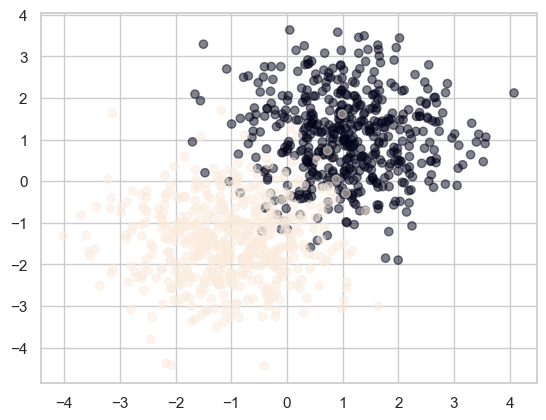

Trainning Accuracy:  0.9440
[-2.08185099 -2.06646665]
[-0.33837419]


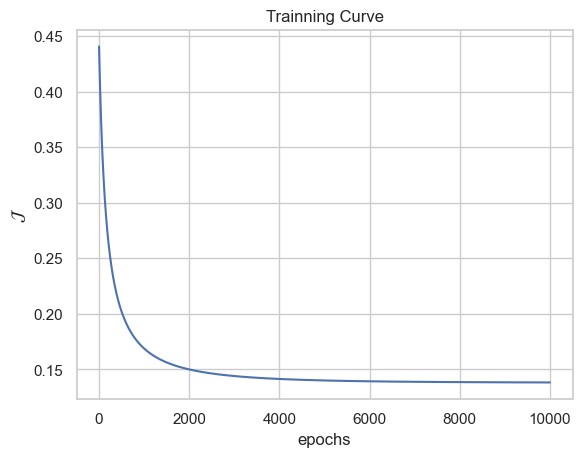

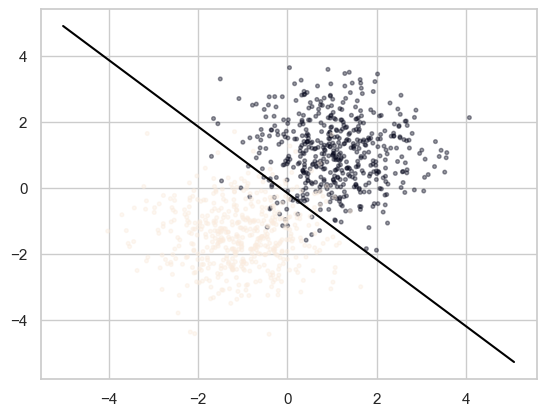

In [175]:
if __name__=="__main__":
    main()

## Multi Class Logistic Regression

### Utility Functions

In [176]:
def softmax(H):
    return (np.exp(H.T)/np.sum(np.exp(H), axis=1)).T

def cat_cross_entropy(Y, P_hat):
    return -(1/len(Y))*np.sum(np.sum(Y*np.log(P_hat), axis=1), axis=0)

def indices_to_one_hot(data, nb_classes):
    targets = np.array(data).reshape(-1)
    return np.eye(nb_classes)[targets]

def accuracy(y, y_hat):
    return np.mean(y == y_hat)

### MV Logistic Regression Class

In [177]:
class MVLogisticRegression():

    def fit(self, X, y, eta=1e-3, epochs = 1e3, show_curve=False):
        epochs = int(epochs)
        N, D = X.shape
        K = len(np.unique(y))
        Y = indices_to_one_hot(y, K).astype(int)

        # Initialize Weights:
        self.W = np.random.randn(D, K)
        self.B =np.random.randn(K)

        J = np.zeros(epochs)
        #  SGD
        for epoch in range(epochs):
            P_hat = self.__forward__(X)
            J[epoch] = cat_cross_entropy(Y, P_hat)

            # Weight Update rules
            self.W -= eta * (1/N) * X.T@(P_hat-Y)
            self.B -= eta*(1/N)*np.sum(P_hat-Y, axis=0)

        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel("epochs")
            plt.ylabel(r"$\mathcal{J}$")
            plt.title("Trainning Curve")

    def __forward__(self, X):
        return softmax(X@self.W + self.B)
    
    def predict(self, X):
        return np.argmax(self.__forward__(X), axis=1)

## Simple Logistic Regression (Binary)